1976. Number of Ways to Arrive at Destination
Solved
Medium
Topics
Companies
Hint
You are in a city that consists of n intersections numbered from 0 to n - 1 with bi-directional roads between some intersections. The inputs are generated such that you can reach any intersection from any other intersection and that there is at most one road between any two intersections.

You are given an integer n and a 2D integer array roads where roads[i] = [ui, vi, timei] means that there is a road between intersections ui and vi that takes timei minutes to travel. You want to know in how many ways you can travel from intersection 0 to intersection n - 1 in the shortest amount of time.

Return the number of ways you can arrive at your destination in the shortest amount of time. Since the answer may be large, return it modulo 109 + 7.

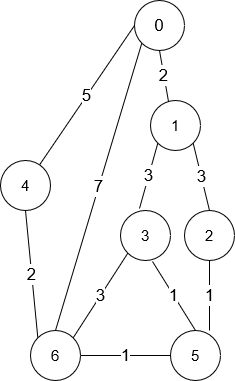
Input: n = 7, roads = [[0,6,7],[0,1,2],[1,2,3],[1,3,3],[6,3,3],[3,5,1],[6,5,1],[2,5,1],[0,4,5],[4,6,2]]
Output: 4
Explanation: The shortest amount of time it takes to go from intersection 0 to intersection 6 is 7 minutes.
The four ways to get there in 7 minutes are:
- 0 ➝ 6
- 0 ➝ 4 ➝ 6
- 0 ➝ 1 ➝ 2 ➝ 5 ➝ 6
- 0 ➝ 1 ➝ 3 ➝ 5 ➝ 6
Example 2:

Input: n = 2, roads = [[1,0,10]]
Output: 1
Explanation: There is only one way to go from intersection 0 to intersection 1, and it takes 10 minutes.


In [ ]:
from collections import defaultdict
import heapq
import math
from typing import List
# Time Complexity:- O(ElogV)
# Space Complexity:- O(n*m)
class Solution:
    def countPaths(self, n: int, roads: List[List[int]]) -> int:
        # Construct the graph
        adjList = defaultdict(list)
        for u, v, w in roads:
            adjList[u].append((v, w))
            adjList[v].append((u, w))  # because the graph is undirected

        # Dijkstra's algorithm variables
        minHeap = [(0, 0)]  # (cost, node), starting from node 0 with 0 cost
        dist = [math.inf] * n
        dist[0] = 0
        path_count = [0] * n
        path_count[0] = 1  # There's one way to be at the start: being at the start

        while minHeap:
            current_time, node = heapq.heappop(minHeap)

            # If we reach the node with time more than we already found, continue
            if current_time > dist[node]:
                continue

            # Process each neighbor
            for neighbor, time in adjList[node]:
                new_time = current_time + time
                if new_time < dist[neighbor]:  # Found a shorter path to neighbor
                    dist[neighbor] = new_time
                    path_count[neighbor] = path_count[node]
                    heapq.heappush(minHeap, (new_time, neighbor))
                elif new_time == dist[neighbor]:  # Found an additional shortest path
                    path_count[neighbor] += path_count[node]
                    path_count[neighbor] %= (10**9 + 7)  # Keep it within the limit

        return path_count[n-1]  # Number of shortest paths to the last node
